In [0]:
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [0]:
from tensorflow.examples.tutorials.mnist import input_data    # Imports mnist tutorial libraries used by tutorial examples.

In [0]:
mnist= input_data.read_data_sets("MNIST_data/",one_hot=True)  # Function for downloading and reading MNIST data.
                                                              # one_hot=True ensures that the labels are one_hot coded

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [0]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
mnist.train.num_examples

55000

In [0]:
mnist.test.num_examples

10000

In [0]:
mnist.validation.num_examples

5000

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
mnist.train.images.shape          # 55000 samples each of 784 (=28*28) pixels

(55000, 784)

In [0]:
single_image = mnist.train.images[1].reshape(28,28)    # single_image is a 2d array with values b/w 0 and 1, both inclusive.

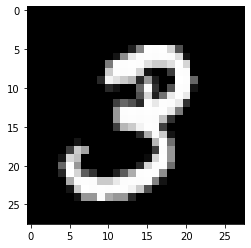

In [0]:
plt.imshow(single_image,cmap='gist_gray')           # cmap='gist_gray' makes the img black and white with gist of gray

In [0]:
single_image.min()

0.0

In [0]:
single_image.max()

1.0

In [0]:
single_image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [0]:

# USING SOFTMAX REGRESSION APPROACH


In [0]:
# placeholders
x=tf.placeholder(tf.float32,shape=[None,784])

In [0]:
# variables
w=tf.Variable(tf.zeros([784,10]))            # weights
b=tf.Variable(tf.zeros([10]))                # bias
#Note:- having weights as zero initially is not good in real case scenario. Here it is taken 0 just for simplifiation
        # the weights and bias gets updated in every iteration and finally reaching the best value. 

In [0]:
# graph operation
y=tf.matmul(x,w)+b

In [0]:
# loss function
y_true= tf.placeholder(tf.float32,shape=[None,10])
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train=optimizer.minimize(cross_entropy)

In [0]:
# create session
init= tf.global_variables_initializer()

In [0]:
saver = tf.train.Saver()

In [0]:
import time
start = time.time()
with tf.Session() as sess:
    sess.run(init)
    
    for steps in range(1000):
        batch_x,batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
                        # first argument is the optimizer function. The second is the data which we want to feed
                        # Since the data is trained here, so both x and y are training data here.
        
        
    # evaluation of model
    correct_prediction=  tf.equal(tf.argmax(y,1), tf.argmax(y_true,1)) 
                                        # argmax() will return list of the index position of the label with highest probablity
                                        # actually it returns the index with the largest value across axes of a tensor
                                        # meaning to say that it will tell what label it thinks it is
                                        # the second argument is the axis
            
    # correct_prediction is a list of trues and false. We need to convert it to zeros and ones to further do calculations
    cast_prediction= tf.cast(correct_prediction,tf.float32)
     
    accuracy=tf.reduce_mean(cast_prediction)    
    
    print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))
                        # Since the data is tested here, so both x and y are testing data here.

    saver.save(sess,'model_char_recog.ckpt')
end = time.time()




   



0.914
